# IN269 Kecerdasan Bisnis
## Pertemuan 09: Binary Classification part II

In [1]:
import pandas as pd
attrition_past = pd.read_csv('attrition_past.csv')
attrition_future = pd.read_csv("attrition2.csv")

## Predicting Binary Outcomes with Logistic Regression
- If we're going to fit a line to points to do binary classification, it will have to be a curve that doesn't go below 0 or above 1, and that also gets close to many of the points (which are all at y = 0 or y = 1).

- One important curve that fits these criteria is called the **logistic curve**. 
- Mathematically, the logistic curve can be described by the following function:
$$
    \text{logistic}(x) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}
$$

- The logistic function is used to model populations, epidemics, chemical reactions, and linguistic shifts, among other things. 
- If you look closely at the denominator of this function, you’ll see $\beta_0 + \beta_1 \cdot x$ $\Rightarrow$ sama dengan **regresi linier** yang sudah kita pelajari.

### Drawing Logistic Curves
We can draw a simple logistic curve in Python as follows:

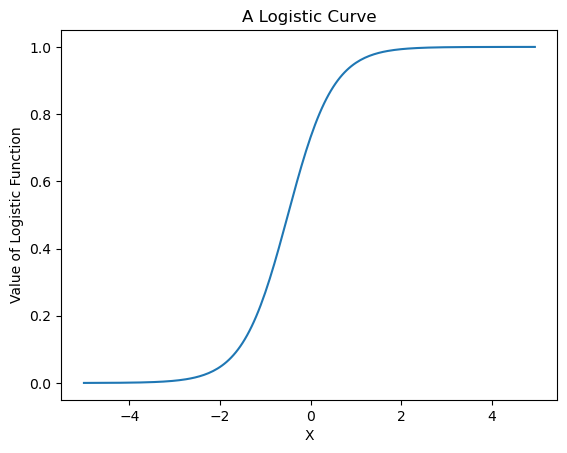

In [2]:
# Drawing Logistic Curves

from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(-1-2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

- The logistic curve has an S-like shape, so it stays close to y = 0 and y = 1 over most of its domain. 
- Also, it never goes above 1 and never goes below 0, so it resolves the weaknesses of LPMs.

If we change the coefficients in our logistic equation to be positive instead of negative, we reverse the direction of the logistic curve, so it’s a backward S instead of a standard S:

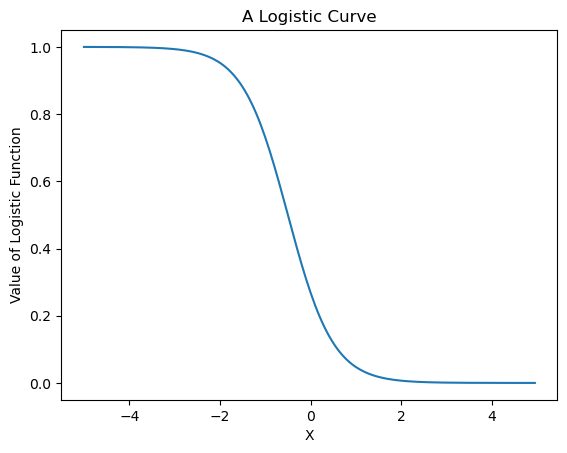

In [3]:
# changing negatives and positives changes direction

from matplotlib import pyplot as plt
import numpy as np
import math
x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

Now let’s use logistic curves with our data.

### Fitting the Logistic Function to Our Data
- We can fit a logistic curve to binary data in much the same way that we fit a straight line to binary data when we created our LPM. 
- Fitting a logistic curve to binary data is also called performing <u>logistic regression</u>, and it’s a common, standard alternative to linear regression for binary classification. 
- We can choose from several useful Python modules to perform logistic regression:

In [4]:
# Fitting the Logistic Function to Our Data

# logistic regression: fitting a logistic curve to binary data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited']
model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


After we fit the model, we can access predicted probabilities for each element as follows:

In [5]:
attrition_past['logisticprediction']=model.predict_proba(x)[:,1]

We can then plot the results:

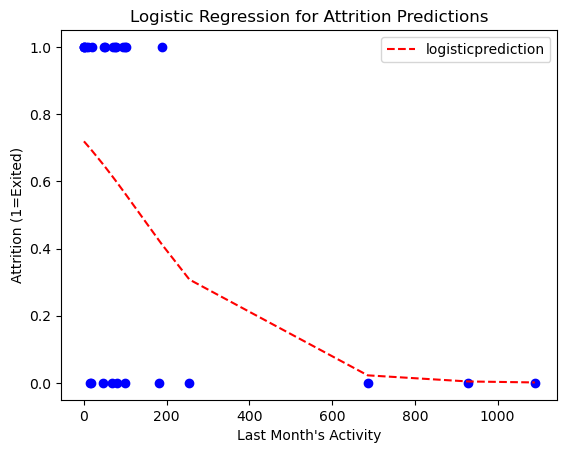

In [6]:
fig = plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'], color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity',\
'logisticprediction',ls='--', ax=fig.axes,color='red')
plt.title('Logistic Regression for Attrition Predictions')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition (1=Exited)')
plt.show()

- You may object that we introduced logistic regression as something that produces an S-shaped curve and there’s no S-shaped curve in the Figure above. 
- But Figure above shows only a portion of the full S.

- Just as we did with other regressions, we can look at the predictions our logistic regression makes. 
- In particular, we can predict the probabilities of attrition for every company in our `attrition2` dataset and print them out in order from highest to lowest attrition risk:

In [7]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticprediction']=model.predict_proba(x)[:,1]
print(list(attrition_future.sort_values(by='logisticprediction',\
ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']


- You can look at these results and compare them to the predictions from our other regressions. 
- Taking into account different information and using different functions to model the data can lead to different results each time we perform regression. 
- In this case, since our logistic regression used the same predictor (last month’s activity) as our first LPM, it ranks corporations from highest to lowest risk in the same order.

### Latihan 
1. Latihlah model _logistic regression_ dengan menggunakan fitur-fitur berikut:
    1. `activity_per_employee`,
    2. `lastmonth_activity`,
    3. `lastyear_activity`, dan 
    4. `number_of_employees`
2. Bandingkan bila dataset dilatih dengan menggunakan model _linear regression_. Anda dapat membandingkan     
      a. accuracy,
      b. precision, 
     c. recall, dan 
     d. $F_1$ score-nya.

In [8]:
attrition_past['activity_per_employee'] = attrition_past.loc[:,'lastmonth_activity'] / attrition_past.loc[:,'number_of_employees']

In [9]:
attrition_past.head()

,corporation,lastmonth_activity,lastyear_activity,number_of_employees,exited,logisticprediction,activity_per_employee
0,abcd,78,1024,12,1,0.599601,6.5
1,asdf,14,2145,20,0,0.699126,0.7
2,xyzz,182,3891,35,0,0.423084,5.2
3,acme,101,10983,2,1,0.561170,50.5
4,qwer,0,118,42,1,0.718948,0.0


In [10]:
attrition_past[['activity_per_employee','lastmonth_activity','lastyear_activity','number_of_employees']].head()

,activity_per_employee,lastmonth_activity,lastyear_activity,number_of_employees
0,6.5,78,1024,12
1,0.7,14,2145,20
2,5.2,182,3891,35
3,50.5,101,10983,2
4,0.0,0,118,42


In [11]:
attrition_past[['activity_per_employee','lastmonth_activity','lastyear_activity','number_of_employees']].values.shape

(26, 4)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = attrition_past[['activity_per_employee','lastmonth_activity','lastyear_activity','number_of_employees']]
y = attrition_past['exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [13]:
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)


y_pred_logreg = logreg_model.predict(X_test)

In [14]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

y_pred_linreg_raw = linreg_model.predict(X_test)

y_pred_linreg = (y_pred_linreg_raw >= 0.5).astype(int)

In [15]:
def calculate_metrics(y_true, y_pred, model_name):
    """Fungsi untuk menghitung dan mencetak metrik klasifikasi."""
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, zero_division=0)
    }
    
    results = pd.DataFrame(metrics, index=[model_name])
    return results

In [16]:
logreg_metrics = calculate_metrics(y_test, y_pred_logreg, 'Logistic Regression')
linreg_metrics = calculate_metrics(y_test, y_pred_linreg, 'Linear Regression (Threshold 0.5)')

comparison_df = pd.concat([logreg_metrics, linreg_metrics])

In [17]:
# Creating New Metrics

# derived feature (or engineered feature) - a feature or metric created by transforming and combing existing variables
attrition_future['activity_per_employee']=attrition_future.loc[:,'lastmonth_activity'] / \
attrition_future.loc[:,'number_of_employees']

In [18]:
attrition_future.columns

Index(['corporation', 'lastmonth_activity', 'lastyear_activity',
       'number_of_employees', 'logisticprediction', 'activity_per_employee'],
      dtype='object')

### Applications of Binary Classification
- Logistic regressions and LPMs are commonly used to predict binary outcomes. 
- We can use them not only for attrition prediction but 
    - also for predicting whether a stock will go up, 
    - whether an applicant will be successful in a job, 
    - whether a project will be profitable, 
    - whether a team will win a game, or any other binary classification that can be expressed in a true/false, 0/1 framework.



- The LPMs and logistic regressions you learned about in pertemuan ini are statistical tools that can tell us the probability of attrition. 
- _But knowing the probability of attrition does not fully solve the business problem that attrition represents_. 
- A business leader needs to communicate these attrition predictions and make sure that client managers act on them effectively. 


- A host of business considerations could alter the strategy a leader implements to manage an attrition problem. 
- For example, attrition probability is not the only thing that could determine the priority assigned to a client.
- That priority will also depend on the relative importance of the client, probably including the revenue the company expects to gain from the client, the size of the client, and other strategic considerations.

- Data science is always part of a larger business process, every step of which is difficult and important.
- LPMs and logistic regressions have one important thing in common: **they’re monotonic**: they express a trend that moves in only one direction. 

- In Figures sebelumnya, less activity is always associated with higher attrition risk, and vice versa. 
- However, imagine a more complex situation, in which low activity is especially associated with high attrition risk, medium activity is associated with low attrition risk, and high activity again is associated with high attrition risk. 
- A monotonic function like the ones examined in this chapter wouldn’t be able to capture this pattern, and we would have to turn to more complex models. 
- Pertemuan berikutnya describes **methods for machine learning**—including methods to capture non-monotonic trends in complex, multivariate data $\Rightarrow$ to make predictions and perform classifications even more accurately.

### Soal Latihan 1
- The dataset `crash.csv` is an accident-survivors dataset portal for the USA (crash data for individual States can be searched) hosted by data.gov. 
- The dataset contains passengers’ (not necessarily the driver’s) age and the speed of the vehicle (mph) at the time of impact and the fate of the passengers (1 represents survived, 0 represents did not survive) after the crash. 
- Now, use the logistic regression to decide if **the age and speed can predict the survivability of the passengers** $\Rightarrow$ hitung accuracy, precision, recall, dan $F_1$ score-nya.

### Soal Latihan 2
- An automated answer-rating site marks each post in a community forum website as “good” or “bad” based on the quality of the post. 
- The CSV file (`quality.csv`) contains the various types of quality as measured by the tool. 

- Following are the type of qualities that the dataset contains:
    - `num_words`: number of words in the post
    - `num_characters`: number of characters in the post
    - `num_misspelled`: number of misspelled words
    - `bin_end_qmark`: if the post ends with a question mark
    - `num_interrogative`: number of interrogative words in the post
    - `bin_start_small`: if the answer starts with a lowercase letter ("1" means yes, otherwise no)
    - `num_sentences`: number of sentences per post
    - `num_punctuations`: number of punctuation symbols in the post
    - `label`: the label of the post ("G" for good and "B" for bad) as determined by the tool.
   
Create a logistics regression model to **predict the class label from the ﬁrst eight attributes of
the question set**. Evaluate the accuracy of your model.   

<center>
        <h1>The End</h1>
</center>